In [1]:
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat
    
dataMat = loadDataSet("testSet.txt")

print(dataMat)

[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.121479, -4.23

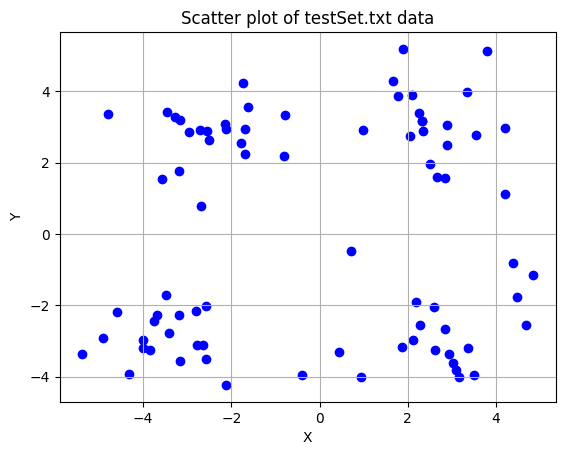

In [2]:
import matplotlib.pyplot as plt
def plot(data, centroids = None):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()
    plt.scatter(x, y, c='blue', marker='o')
    
    if centroids is not None:
        centroids = np.array(centroids)
        cx = centroids[:, 0].flatten().tolist()
        cy = centroids[:, 1].flatten().tolist()
        plt.scatter(cx, cy, c='red', marker='D', s=100, label='Centroïdes')
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of testSet.txt data')
    plt.grid(True)
    plt.show()
plot(dataMat)

In [3]:
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2)))
print(dataMat[0], dataMat[1])
print(distEclud(np.array(dataMat[0]), np.array(dataMat[1])))

[1.658985, 4.285136] [-3.453687, 3.424321]
5.184632816681332


In [5]:
def plot_cluster(data, clusterAssment, centroids):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()

    # Dictionnaire de couleurs pour les clusters (jusqu'à 10 clusters ici)
    colors = {0: "red", 1: "blue", 2: "green", 3: "purple",4: "yellow",5: "cyan",6: "orange",7: "magenta",8: "brown",9: "pink"}

    # Si clusterAssment est fourni, colorie les points selon leur cluster
    cluster_ids = clusterAssment[:, 0].flatten().astype(int).tolist()
    colors_points = [colors[cid] for cid in cluster_ids]
    plt.scatter(x, y, c=colors_points, marker='o', label='Points')

    centroids = np.array(centroids)
    cx = centroids[:, 0].flatten().tolist()
    cy = centroids[:, 1].flatten().tolist()
    plt.scatter(cx, cy, c='black', marker='D', s=100, label='Centroides')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with clusters and centroids')
    plt.legend()
    plt.grid(True)
    plt.show()


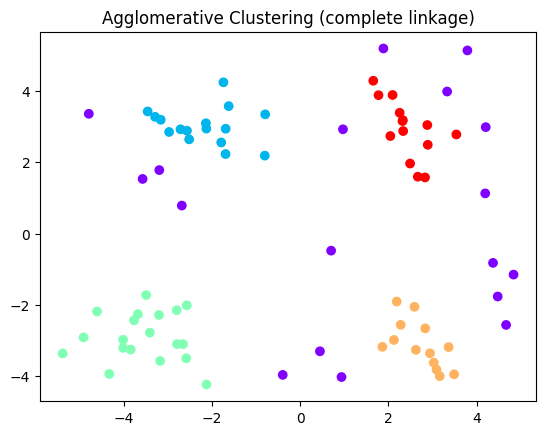

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

db = DBSCAN(eps=1, min_samples=5)
labels = db.fit_predict(dataMat)

x = np.array(dataMat)[:, 0].flatten().tolist()
y = np.array(dataMat)[:, 1].flatten().tolist()
plt.scatter(x, y, c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (complete linkage)")
plt.show()